# 3.2 - Reduccion de dimensiones

### PCA  (análisis de componente principal)

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](images/gioconda.jpeg)
![gio2](images/gioconda_lego.png)

#### Ejemplo intuitivo

In [1]:
import pylab as plt
%matplotlib inline

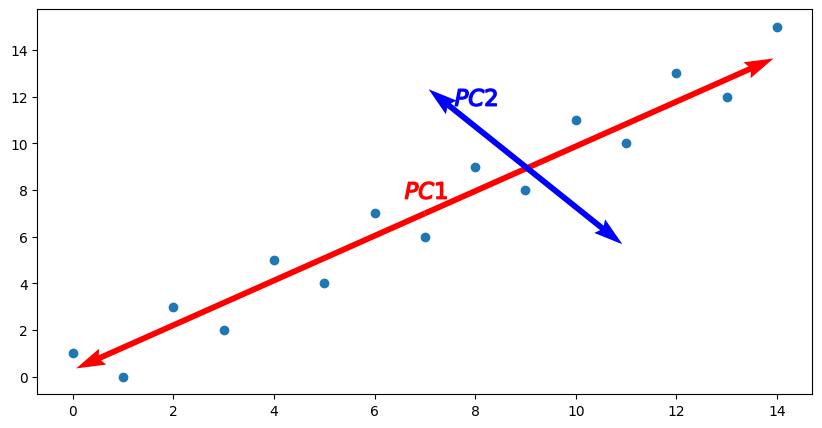

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [i+1 if i%2==0 else i-1 for i in range(15)])

plt.quiver(7, 7, 9, 4, color='r', scale=20)
plt.quiver(7, 7, -9, -4, color='r', scale=20)
plt.plot(7, 8, marker='$PC1$', ms=30, color='r')

plt.quiver(9, 9, -5, 4, color='b', scale=40)
plt.quiver(9, 9, 5, -4, color='b', scale=40)
plt.plot(8, 12, marker='$PC2$', ms=30, color='b');

Se rota y se proyecta, resultando:

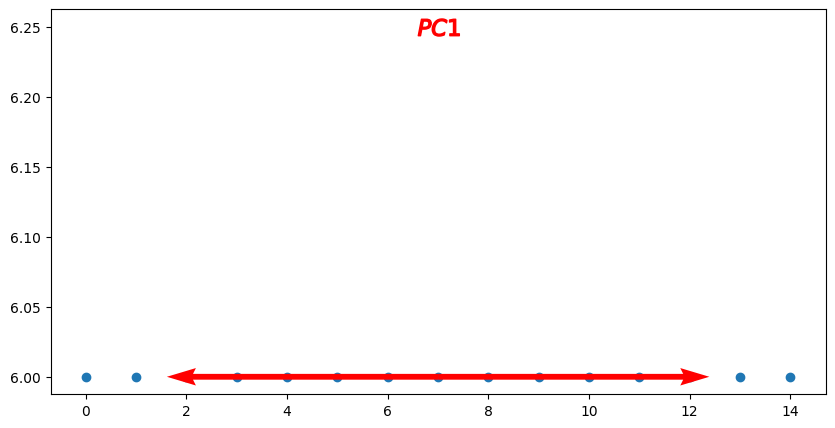

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [6 for i in range(15)])

plt.quiver(7, 6, 7, 0, color='r', scale=20)
plt.quiver(7, 6, -7, 0, color='r', scale=20)
plt.plot(7, 6.25, marker='$PC1$', ms=30, color='r');

**Combinacion lineal**

$v1>$ vector 1

$v2>$ vector 2

comb lineal = 2·$v1$ - 4·$v2$

**Combinacion no lineal**

comb no lineal = 2·$v1$·$v2$

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

#### normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la **estandarización**  ($N(\mu, \sigma)$):

$$\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

Ahora el **MinMax** :

$$\frac{x-min}{max-min}$$

Se usa la standarización:

Se aplica **PCA**

### UMAP (uniform manifold aprox and projection)

Tiene dos pasos:

+ KNN con pesos, según topología (grafo)
+ Se reduce la dimensión basándose en esa topología

https://umap-learn.readthedocs.io/en/latest/

### t-SNE

**t-Distributed Stochastic Neighbor Embbeding**

Convierte similitudes entre los datos en probabilidad conjunta y trata de minimizar la divergencia _Kullback-Leibler_ (entropía relativa):

$$D_{KL}(P|Q)=\sum P(x)log(\frac{P(x)}{Q(x)})$$

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

## Guardar modelo de machine learning